<a href="https://colab.research.google.com/github/IS737StockPicker/stonks/blob/main/Logistic_Regression_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression Script


---
Runthis code to build a model that estimates the probability of a stock's rise or fall on a particular day, using daily news sentiment as a predictor.


In [1]:
%rm -rf stonks/
%matplotlib inline
# Importing all of the required packages to run this model including one from the book

import pandas as pd
from datetime import datetime
from datetime import date
from sklearn import preprocessing
import matplotlib.pylab as plt
from sklearn.metrics import accuracy_score
!pip install -U dmba;
from dmba import regressionSummary
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 49.4 MB/s eta 0:00:00
no display found. Using non-interactive Agg backend


In [2]:
#importing our git repository to get the CSV files needed to run the model.
%%capture
!git clone https://github.com/IS737StockPicker/stonks

# Section 1: EDA
Running a quick analysis to ckeck on multicollinary and to get a sense of the data for all the news data.



In [10]:
Guardian_Data= pd.read_csv('/content/stonks/guardian_data.csv')
Guardian_Data.head()
Guardian_Data.info()
Huff_News_Data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             185 non-null    object 
 1   Headline Mean    185 non-null    float64
 2   Body Mean        185 non-null    float64
 3   Headline Median  185 non-null    float64
 4   Body Median      185 non-null    float64
 5   Headline Min     185 non-null    float64
 6   Headline Max     185 non-null    float64
 7   Body Min         185 non-null    float64
 8   Body Max         185 non-null    float64
dtypes: float64(8), object(1)
memory usage: 13.1+ KB


,Headline Mean,Body Mean,Headline Median,Body Median,Headline Max,Body Max,Headline Min,Body Min
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,-0.163224,-0.104317,-0.156284,-0.098689,0.129617,0.251749,-0.458907,-0.462240
std,0.228728,0.282950,0.247078,0.318865,0.332887,0.352804,0.307526,0.376941
min,-0.840000,-0.760000,-0.840000,-0.760000,-0.840000,-0.760000,-0.920000,-0.920000
25%,-0.315000,-0.275000,-0.340000,-0.330000,0.000000,0.000000,-0.715000,-0.760000
50%,-0.150000,-0.110000,-0.030000,-0.030000,0.000000,0.320000,-0.530000,-0.570000
75%,0.000000,0.040000,0.000000,0.000000,0.400000,0.530000,-0.230000,-0.240000
max,0.400000,0.720000,0.480000,0.720000,0.880000,0.880000,0.400000,0.720000


In [5]:
Guardian_Data.corr()

<ipython-input-5-91a4fc21a49c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Guardian_Data.corr()


,Headline Mean,Body Mean,Headline Median,Body Median,Headline Min,Headline Max,Body Min,Body Max
Headline Mean,1.000000,0.371308,0.626007,0.304151,0.351275,0.254448,NaN,NaN
Body Mean,0.371308,1.000000,0.211007,0.932642,0.174014,0.092900,NaN,NaN
Headline Median,0.626007,0.211007,1.000000,0.172106,0.139209,0.118279,NaN,NaN
Body Median,0.304151,0.932642,0.172106,1.000000,0.154351,0.080880,NaN,NaN
Headline Min,0.351275,0.174014,0.139209,0.154351,1.000000,0.038304,NaN,NaN
Headline Max,0.254448,0.092900,0.118279,0.080880,0.038304,1.000000,NaN,NaN
Body Min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Body Max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
Huff_News_Data = pd.read_csv('/content/stonks/Huff_News_Avg_News_Sentiment.csv')
Huff_News_Data.head()
Huff_News_Data.describe()

,Headline Mean,Body Mean,Headline Median,Body Median,Headline Max,Body Max,Headline Min,Body Min
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,-0.163224,-0.104317,-0.156284,-0.098689,0.129617,0.251749,-0.458907,-0.462240
std,0.228728,0.282950,0.247078,0.318865,0.332887,0.352804,0.307526,0.376941
min,-0.840000,-0.760000,-0.840000,-0.760000,-0.840000,-0.760000,-0.920000,-0.920000
25%,-0.315000,-0.275000,-0.340000,-0.330000,0.000000,0.000000,-0.715000,-0.760000
50%,-0.150000,-0.110000,-0.030000,-0.030000,0.000000,0.320000,-0.530000,-0.570000
75%,0.000000,0.040000,0.000000,0.000000,0.400000,0.530000,-0.230000,-0.240000
max,0.400000,0.720000,0.480000,0.720000,0.880000,0.880000,0.400000,0.720000


In [8]:
Huff_News_Data.corr()

<ipython-input-8-0f5b740a4dd4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Huff_News_Data.corr()


,Headline Mean,Body Mean,Headline Median,Body Median,Headline Max,Body Max,Headline Min,Body Min
Headline Mean,1.000000,0.260922,0.921569,0.279690,0.723877,0.239879,0.708752,0.133440
Body Mean,0.260922,1.000000,0.243940,0.937830,0.070590,0.712959,0.298899,0.779593
Headline Median,0.921569,0.243940,1.000000,0.252511,0.605930,0.239018,0.571799,0.119432
Body Median,0.279690,0.937830,0.252511,1.000000,0.109034,0.598799,0.288978,0.682880
Headline Max,0.723877,0.070590,0.605930,0.109034,1.000000,0.292421,0.121744,-0.212849
Body Max,0.239879,0.712959,0.239018,0.598799,0.292421,1.000000,0.025364,0.197150
Headline Min,0.708752,0.298899,0.571799,0.288978,0.121744,0.025364,1.000000,0.420824
Body Min,0.133440,0.779593,0.119432,0.682880,-0.212849,0.197150,0.420824,1.000000


Below is the master data set that merges the stock and news sentiment data that will be used to conduct the logistic regression model. 

In [11]:
Master_Data = pd.read_csv('/content/stonks/master_data.csv')
Master_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      125 non-null    object 
 1   XLE                       125 non-null    float64
 2   XLF                       125 non-null    float64
 3   XLU                       125 non-null    float64
 4   XLI                       125 non-null    float64
 5   XLK                       125 non-null    float64
 6   XLV                       125 non-null    float64
 7   XLY                       125 non-null    float64
 8   IYR                       125 non-null    float64
 9   AAPL                      125 non-null    float64
 10  XLB                       125 non-null    float64
 11  XLP                       125 non-null    float64
 12  SPY                       125 non-null    float64
 13  ^DJI                      125 non-null    float64
 14  NDX       

### **Section 2:** Scaling the data and testing a time series split**


In [18]:
#To standardize the data and achieve 0 mean and unit variance, we use the 'scale()' function from the 'sklearn.preprocessing' library.
#First, we subtract the mean of each column from the corresponding values in each row (i.e., 'uni_mdf - Uni_mdf.mean()').
#Then we divide the result by the standard deviation.
#The resulting units are in standard deviations, which tells us how many standard deviations each value is away from the mean.
Data_to_Scale = Master_Data.drop(columns=['SPY','XLP','Date',  'XLE',  'XLF' , 'XLU' , 'XLI'  ,'XLK'  ,'XLV'  ,'XLY' , 'IYR' , 'AAPL' , 'XLB' , '^DJI' , 'NDX'])
scaled_Master_Data=pd.DataFrame(preprocessing.scale(Data_to_Scale))

QA'ing to ensure that the formula worked as intended. 

In [13]:
(Data_to_Scale - Data_to_Scale.mean())/Data_to_Scale.std()

,guardian_headline_mean,guardian_body_mean,guardian_headline_median,guardian_body_median,guardian_headline_min,guardian_headline_max,guardian_body_min,guardian_body_max,Huff_headline_mean,Huff_body_mean,...,Huff_headline_min,Huff_body_min,NYT_headline_mean,NYT_headline_median,NYT_body_mean,NYT_body_median,NYT_headline_max,NYT_headline_min,NYT_body_max,NYT_body_min
0,0.155578,0.118783,0.466742,0.137537,2.317672,-0.274965,NaN,NaN,0.078561,0.030162,...,-1.184336,-0.700182,-0.550281,0.173736,-0.641388,-0.167214,1.210000,2.619216,0.536794,-1.414760
1,-1.635616,-0.895666,-2.107203,-0.838673,-1.309736,0.599924,NaN,NaN,-1.264359,-1.090721,...,-1.059537,-1.150943,-1.182787,0.173736,-0.127455,-0.167214,0.678366,-0.016218,-0.143266,-0.026652
2,1.435003,-1.264557,0.466742,-0.856751,1.350363,-0.649918,NaN,NaN,1.001818,-0.071736,...,0.531641,-0.424717,-0.708407,0.173736,-0.333028,-0.167214,0.944183,1.200136,-0.143266,0.250970
3,0.923233,-2.002338,0.466742,-1.399090,1.108536,0.349956,NaN,NaN,-0.257169,-0.241567,...,-1.496331,-0.249421,-0.075901,0.173736,-0.846961,-0.167214,-2.378533,0.389233,-1.503385,0.528592
4,1.179118,-0.618998,0.466742,-0.422880,-0.342427,0.849893,NaN,NaN,-0.886663,-0.785025,...,-0.560344,-0.925562,-0.708407,0.173736,-0.846961,-0.978934,0.545457,0.794685,-0.596639,-1.692382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,-0.100307,1.409900,0.466742,1.638009,0.383054,0.224972,NaN,NaN,-0.215203,-0.411398,...,-1.121937,-0.449759,1.663492,0.173736,-1.052534,-0.167214,-1.846898,-0.016218,-1.050012,-0.581895
121,0.923233,2.147681,0.466742,1.746477,-0.342427,-0.649918,NaN,NaN,-0.467000,-2.347468,...,-1.090737,-1.100858,-0.392154,0.173736,-0.538601,-0.167214,-0.517812,-0.827121,0.763480,-0.581895
122,1.435003,3.438798,0.466742,1.854945,0.624882,0.349956,NaN,NaN,0.162493,1.083112,...,-0.560344,0.977650,0.082226,0.173736,1.105983,1.253296,0.279640,1.200136,-0.823325,-0.026652
123,-0.612077,0.303228,0.466742,0.318317,-1.309736,0.224972,NaN,NaN,-1.096494,1.151044,...,-1.153136,0.977650,-1.340914,0.173736,-0.949747,-1.486259,-0.517812,-0.827121,0.083421,0.528592


In [16]:
scaled_Master_Data.describe()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,125.0,125.0,1.250000e+02,1.250000e+02,...,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02
mean,8.615331e-17,8.881784e-18,1.154632e-17,3.552714e-17,1.312728e-15,-1.210587e-15,0.0,0.0,3.752554e-17,2.220446e-17,...,1.643130e-16,4.085621e-17,4.440892e-17,-1.287859e-17,3.552714e-17,-4.884981e-17,1.367795e-16,1.507461e-15,1.048051e-16,-1.218581e-15
std,1.004024e+00,1.004024e+00,1.004024e+00,1.004024e+00,1.004024e+00,1.004024e+00,0.0,0.0,1.004024e+00,1.004024e+00,...,1.004024e+00,1.004024e+00,1.004024e+00,1.004024e+00,1.004024e+00,1.004024e+00,1.004024e+00,1.004024e+00,1.004024e+00,1.004024e+00
min,-2.669857e+00,-2.195583e+00,-3.838551e+00,-1.549926e+00,-1.557807e+00,-2.534842e+00,0.0,0.0,-2.954851e+00,-2.356914e+00,...,-1.502353e+00,-1.331576e+00,-3.092703e+00,-9.516405e+00,-2.501571e+00,-3.224086e+00,-2.921878e+00,-1.848157e+00,-3.330225e+00,-1.699192e+00
25%,-6.145398e-01,-6.214893e-01,4.686202e-01,-8.783497e-01,-8.294061e-01,-7.780207e-01,0.0,0.0,-5.110146e-01,-6.517731e-01,...,-8.445253e-01,-8.538578e-01,-7.112581e-01,1.744351e-01,-6.439687e-01,-1.678872e-01,-5.198958e-01,-8.304493e-01,-5.990399e-01,-8.629755e-01
50%,1.562041e-01,2.666700e-02,4.686202e-01,-6.156724e-02,-1.010050e-01,2.258770e-01,0.0,0.0,7.887693e-02,-3.792234e-02,...,-2.180229e-01,-3.007108e-01,-7.620622e-02,1.744351e-01,-1.279681e-01,-1.678872e-01,1.473216e-01,-1.628332e-02,8.375634e-02,-2.675893e-02
75%,6.700334e-01,5.822296e-01,4.686202e-01,9.185717e-01,6.273962e-01,7.278258e-01,0.0,0.0,5.844983e-01,6.441341e-01,...,1.222933e+00,9.061553e-01,7.176086e-01,1.744351e-01,5.944326e-01,-1.678872e-01,6.810955e-01,5.943412e-01,7.665526e-01,5.307188e-01
max,2.211521e+00,3.452636e+00,4.686202e-01,1.862409e+00,2.812600e+00,2.233672e+00,0.0,0.0,2.269903e+00,2.690303e+00,...,2.569913e+00,2.791884e+00,2.464001e+00,1.744351e-01,2.452035e+00,3.295805e+00,1.882087e+00,3.851005e+00,2.359744e+00,2.760630e+00


In [22]:
#importing all of the required packages for the logistic regression model
%matplotlib inline
import math
import numpy as np
import matplotlib.pylab as plt
from sklearn.linear_model import LogisticRegression

# sklearn data and model packages
from sklearn.model_selection import train_test_split #splits data between training and test sets
from sklearn.model_selection import KFold #use k-1 groups to train models
from sklearn.model_selection import cross_val_score #

from sklearn.metrics import * #evaluates the confusion metrics

import seaborn as sns

Checking to make sure that we are not below 70% of signal of original data.

In [20]:
# PCA after scaling
from sklearn.decomposition import PCA
import numpy as np
pcs = PCA(n_components=12)
pcs.fit(scaled_Master_Data)

# view the importance of principal components
np.cumsum(pcs.explained_variance_ratio_.round(3))

array([0.175, 0.308, 0.414, 0.501, 0.57 , 0.633, 0.689, 0.738, 0.786,
       0.826, 0.866, 0.894])

Ploting the master data set to eye if there are any correlations/patterns

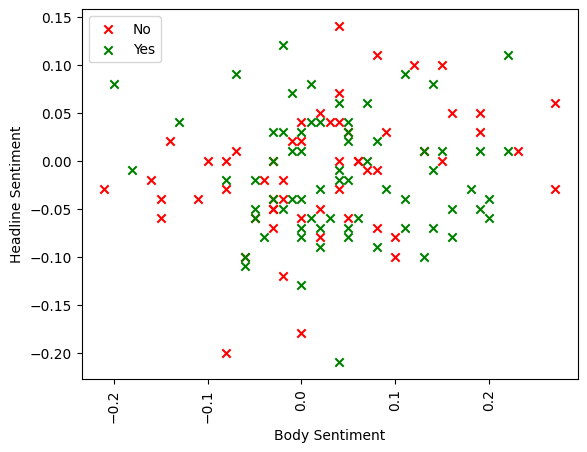

In [23]:
#for this example, I am using the New York Times news sentiment
fig, ax = plt.subplots()

subset0 = Master_Data.loc[Master_Data['XLE']== 0]
ax.scatter(subset0.NYT_body_mean, subset0.NYT_headline_mean, marker='x', label='No', color='red')

subset1 = Master_Data.loc[Master_Data['XLE']== 1]
ax.scatter(subset1.NYT_body_mean, subset1.NYT_headline_mean, marker='x', label='Yes', color='green')

plt.ylabel('Headline Sentiment')  # set x-axis label
plt.xlabel('Body Sentiment')  # set y-axis label
plt.xticks(rotation=90)  

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels);

*In the code below, I initially used a time series split to divide the data into test and control sets for logistic regression. However, I realized that this approach is incorrect since the stock market data is not entirely random over time. Therefore, I switched to a 20-80 random split for the test and control sets.

In [28]:
# Stock Market data is time series 
# with the training data I did the first 60 days 
# and then the test data is following days 
import warnings
warnings.filterwarnings("ignore")

stocks = ['SPY','XLE','XLF','XLP','XLU','XLI','IYR','AAPL','NDX','XLP',  'XLE',  'XLF' , 'XLU' , 'XLI'  ,'XLK'  ,'XLV'  ,'XLY' , 'IYR' , 'AAPL' , 'XLB' , '^DJI' , 'NDX']
for stock in stocks:
    Master_Data[stock] = Master_Data[stock].astype('category')
    #print(stock)
    y = Master_Data[stock]
    #print(y[stock])
    X = Master_Data.drop(columns=['SPY','XLP','Date',  'XLE',  'XLF' , 'XLU' , 'XLI'  ,'XLK'  ,'XLV'  ,'XLY' , 'IYR' , 'AAPL' , 'XLB' , '^DJI' , 'NDX'])
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.4, random_state = 1, stratify = y)
    lr = LogisticRegression(penalty="none", solver='lbfgs')
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    print(stock.lower())
    print(confusion_matrix(y_test,y_pred))
    print(accuracy_score(y_test, y_pred))
    print(len(y_train)+len(y_test))
    print('**********************************************************************************************************************************************')

spy
[[ 5 17]
 [12 16]]
0.42
125
**********************************************************************************************************************************************
xle
[[12 11]
 [ 9 18]]
0.6
125
**********************************************************************************************************************************************
xlf
[[12 11]
 [16 11]]
0.46
125
**********************************************************************************************************************************************
xlp
[[14  9]
 [15 12]]
0.52
125
**********************************************************************************************************************************************
xlu
[[12 12]
 [11 15]]
0.54
125
**********************************************************************************************************************************************
xli
[[ 7 13]
 [10 20]]
0.54
125
**********************************************************************************************

Second attempt of running the model, this time using a random 40% split for testing data. This is using some of the code that we used in class for logistic regression.

Standardizing the data

In [29]:
stocks = ['SPY','XLP','Date',  'XLE',  'XLF' , 'XLU' , 'XLI'  ,'XLK'  ,'XLV'  ,'XLY' , 'IYR' , 'AAPL' , 'XLB' , '^DJI' , 'NDX']


Master_Data['AAPL'] = Master_Data['AAPL'].astype('category')

# Define X and y
y = Master_Data['AAPL']
X = Master_Data.drop(columns=['SPY','XLP','Date',  'XLE',  'XLF' , 'XLU' , 'XLI'  ,'XLK'  ,'XLV'  ,'XLY' , 'IYR' , 'AAPL' , 'XLB' , '^DJI' , 'NDX'])
X.head()
#print(y)

,guardian_headline_mean,guardian_body_mean,guardian_headline_median,guardian_body_median,guardian_headline_min,guardian_headline_max,guardian_body_min,guardian_body_max,Huff_headline_mean,Huff_body_mean,...,Huff_headline_min,Huff_body_min,NYT_headline_mean,NYT_headline_median,NYT_body_mean,NYT_body_median,NYT_headline_max,NYT_headline_min,NYT_body_max,NYT_body_min
0,-0.13,-0.01,0.00,-0.00,-0.78,0.72,-1.0,1.0,-0.12,-0.06,...,-0.80,-0.67,-0.05,0.0,-0.03,0.00,0.88,-0.73,0.91,-0.96
1,-0.20,-0.12,-0.15,-0.54,-0.93,0.79,-1.0,1.0,-0.44,-0.39,...,-0.76,-0.85,-0.09,0.0,0.02,0.00,0.84,-0.86,0.88,-0.91
2,-0.08,-0.16,0.00,-0.55,-0.82,0.69,-1.0,1.0,0.10,-0.09,...,-0.25,-0.56,-0.06,0.0,-0.00,0.00,0.86,-0.80,0.88,-0.90
3,-0.10,-0.24,0.00,-0.85,-0.83,0.77,-1.0,1.0,-0.20,-0.14,...,-0.90,-0.49,-0.02,0.0,-0.05,0.00,0.61,-0.84,0.82,-0.89
4,-0.09,-0.09,0.00,-0.31,-0.89,0.81,-1.0,1.0,-0.35,-0.30,...,-0.60,-0.76,-0.06,0.0,-0.05,-0.08,0.83,-0.82,0.86,-0.97


In [30]:
# Use train/test split function
#the split 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.4, random_state = 1, stratify = y)
X_train

,guardian_headline_mean,guardian_body_mean,guardian_headline_median,guardian_body_median,guardian_headline_min,guardian_headline_max,guardian_body_min,guardian_body_max,Huff_headline_mean,Huff_body_mean,...,Huff_headline_min,Huff_body_min,NYT_headline_mean,NYT_headline_median,NYT_body_mean,NYT_body_median,NYT_headline_max,NYT_headline_min,NYT_body_max,NYT_body_min
5,-0.12,-0.12,0.00,-0.60,-0.91,0.72,-1.0,1.0,0.01,-0.13,...,-0.57,-0.64,-0.08,0.0,0.05,0.00,0.83,-0.87,0.91,-0.96
52,-0.12,-0.02,0.00,-0.08,-0.89,0.81,-1.0,1.0,-0.06,0.33,...,-0.15,0.08,-0.07,0.0,0.02,0.00,0.85,-0.90,0.90,-0.90
13,-0.08,0.02,0.00,0.26,-0.81,0.73,-1.0,1.0,-0.31,-0.19,...,-0.62,-0.69,0.02,0.0,-0.01,0.00,0.64,-0.86,0.90,-0.90
100,-0.13,-0.05,-0.03,-0.42,-0.93,0.59,-1.0,1.0,-0.04,0.12,...,-0.65,-0.32,0.01,0.0,-0.01,0.00,0.77,-0.86,0.94,-0.91
116,-0.12,0.05,0.00,0.65,-0.90,0.82,-1.0,1.0,-0.32,-0.22,...,-0.64,-0.75,0.02,0.0,0.05,0.00,0.73,-0.81,0.87,-0.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,-0.19,-0.07,-0.05,-0.26,-0.89,0.70,-1.0,1.0,-0.17,-0.35,...,-0.48,-0.90,0.01,0.0,-0.07,0.00,0.81,-0.84,0.88,-0.97
57,-0.06,0.19,0.00,0.77,-0.91,0.80,-1.0,1.0,0.00,0.38,...,0.00,0.38,-0.04,0.0,-0.03,0.00,0.80,-0.93,0.88,-0.94
58,-0.12,0.11,0.00,0.60,-0.91,0.64,-1.0,1.0,-0.34,-0.67,...,-0.34,-0.67,-0.04,0.0,-0.15,0.00,0.81,-0.88,0.87,-0.89
90,-0.14,-0.10,0.00,-0.69,-0.89,0.65,-1.0,1.0,-0.13,-0.15,...,-0.38,-0.59,-0.08,0.0,0.10,0.03,0.84,-0.90,0.94,-0.85


In [31]:

# Define the scaling object
scaler = preprocessing.StandardScaler()

# Fit the scaler to the training data to compute means and variances
# Note: only fit the scaler to training data, not the testing data
scaler.fit(X_train)

# Scale the data using the means and variances computed in the previous step
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Note that there is no need to scale the target variable (y), since this is what
# we are trying to predict

In [32]:
# checking the number of records in each dataset
print('X_train rows = ', len(X_train_scaled), 'X_test rows = ', len(X_test_scaled))
print('y_train rows = ', len(y_train), 'y_test rows = ', len(y_test))

X_train rows =  75 X_test rows =  50
y_train rows =  75 y_test rows =  50


In [33]:
# Checking to see what the breakout is for toal number of positive days (1)

prop_y_orig = round(sum(y)/len(y),2);
prop_y_train = round(sum(y_train)/len(y_train),2);
prop_y_test = round(sum(y_test)/len(y_test),2);

print("% of 1's in orig dataset=", prop_y_orig)
print("% of 1's in y_train=", prop_y_train) 
print("% of 1's in y_test=", prop_y_test)

% of 1's in orig dataset= 0.57
% of 1's in y_train= 0.57
% of 1's in y_test= 0.56


Running the data from a scaled dataset

In [35]:
# Logistic Regression
lr = LogisticRegression(penalty="none", solver='lbfgs')
lr.fit(X_train_scaled, y_train)

LogisticRegression(penalty='none')

In [36]:
# Run class y predictions
y_pred = lr.predict(X_test_scaled)

In [37]:
# Confusion Matrix
confusion_matrix(y_test,y_pred)

array([[ 7, 15],
       [11, 17]])

In [38]:
#as you can see the model performed horribly which is why we decided to rerun everything from scratch as the following section will detail
accuracy_score(y_test, y_pred)


0.48

<h1>Data Analysis Take 2</h1>

In this section, we model two different datasets: one to predict the probability of a win/loss for the day's news (master_date), and the other to examine how the previous day's data affects the next day's stock price. We ran a total of 12 different models to determine not only the most predictive news source but also whether there was a difference between using the headline or the body of an article.

In this version, we also compare our results to a baseline score to determaine the success of our model.

**master_data.csv**
Model 1: Median headline for three news sites
Model 2: Mean headline for three news sites
Model 3: Median body for three news sites
Model 4: Mean body for three news sites
Model 5: Min/Mix headline for three news sites
Model 6: Min/Max body for three news sites

**Master_data_future.csv (predict the future)**
Model 1: Median headline for three news sites
Model 2: Mean headline for three news sites
Model 3: Median body for three news sites
Model 4: Mean body for three news sites
Model 5: Min/Mix headline for three news sites
Model 6: Min/Max body for three news sites


# Section 1: Present Day Data





In [43]:
stock_data= pd.read_csv('/content/stonks/master_data.csv')
#stock_data['Date'] = stock_data['Date'].dt.date(stock_data['Date'])
stock_data.head()

,Date,XLE,XLF,XLU,XLI,XLK,XLV,XLY,IYR,AAPL,...,Huff_headline_min,Huff_body_min,NYT_headline_mean,NYT_headline_median,NYT_body_mean,NYT_body_median,NYT_headline_max,NYT_headline_min,NYT_body_max,NYT_body_min
0,2022-03-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.80,-0.67,-0.05,0.0,-0.03,0.00,0.88,-0.73,0.91,-0.96
1,2022-03-15,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,-0.76,-0.85,-0.09,0.0,0.02,0.00,0.84,-0.86,0.88,-0.91
2,2022-03-16,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.25,-0.56,-0.06,0.0,-0.00,0.00,0.86,-0.80,0.88,-0.90
3,2022-03-17,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.90,-0.49,-0.02,0.0,-0.05,0.00,0.61,-0.84,0.82,-0.89
4,2022-03-18,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.60,-0.76,-0.06,0.0,-0.05,-0.08,0.83,-0.82,0.86,-0.97


In [44]:
#Specify Target Vars and getting ride of the date field (as we are not using data as a predictor)

tickers = stock_data.iloc[:,:15]
tickers = tickers.drop(columns=['Date'])
tickers

,XLE,XLF,XLU,XLI,XLK,XLV,XLY,IYR,AAPL,XLB,XLP,SPY,^DJI,NDX
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
121,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
122,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
123,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0


In [45]:
#getting the baseline scores if we were to classify each day as a win
baseline_acc = {}
for ticker in tickers:
  baseline_acc[ticker] = round(sum(stock_data[ticker])/125,2)
  print(sum(stock_data[ticker])/125)

0.544
0.536
0.52
0.592
0.544
0.568
0.504
0.504
0.568
0.48
0.544
0.568
0.536
0.52


We ran a logistic regression for each of the target variables using six iterations of input data (mean, median, and min/max for both headline and body sentiment scores).

In [46]:
#Running the regression for the dataset containing news scores and stock win/losses that occured on the same day

import warnings
warnings.filterwarnings("ignore")

present_acc_scores={}
baseline_present = {}
for ticker in tickers:
  #print(ticker)
  mean_headline_var = [ticker,'guardian_headline_mean','Huff_headline_mean','NYT_headline_mean']
  median_body_var = [ticker,'guardian_body_median','Huff_body_median','NYT_body_median']
  mean_body_var = [ticker,'guardian_body_mean','Huff_body_mean','NYT_body_mean']
  median_headline_var = [ticker,'guardian_headline_median','Huff_headline_median','NYT_headline_median']
  min_max_headline_var = [ticker,'guardian_headline_min','guardian_headline_max','Huff_headline_min','Huff_headline_max','NYT_headline_min','NYT_headline_max']
  min_max_body_var = [ticker,'guardian_body_min','guardian_body_max','Huff_body_min','Huff_body_max','NYT_body_min','NYT_body_max']
  model_inputs = [mean_headline_var,mean_body_var,median_headline_var,median_body_var,min_max_headline_var,min_max_body_var]
  input_arr = []
  for inputs in range(len(model_inputs)):
    accuracy_df = stock_data[model_inputs[inputs]]
    y_nonscaled = accuracy_df[[ticker]]
    X_nonscaled = accuracy_df.drop(columns=[ticker])
    scaleOutput = MinMaxScaler()
    scaleInput = MinMaxScaler()
    y = scaleOutput.fit_transform(y_nonscaled)
    X = scaleInput.fit_transform(X_nonscaled)
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.28, random_state=5)
    

    lr = LogisticRegression(penalty="none", solver='lbfgs')
    lr.fit(X_train, y_train.ravel())
    y_pred = lr.predict(X_valid)
    input_arr.append(round(accuracy_score(y_valid, y_pred),2))

    
  present_acc_scores[ticker] = input_arr
  baseline_present[ticker] = round(sum(y_pred)/35,2)

In [47]:
baseline_present

{'XLE': 0.71,
 'XLF': 0.57,
 'XLU': 0.49,
 'XLI': 0.74,
 'XLK': 0.54,
 'XLV': 0.74,
 'XLY': 0.63,
 'IYR': 0.31,
 'AAPL': 0.66,
 'XLB': 0.37,
 'XLP': 0.69,
 'SPY': 0.71,
 '^DJI': 0.63,
 'NDX': 0.46}

In [48]:
# Here, we created a table to compare our baseline score to the 6 different predictor variables
# As the results indict, performance against the baseline is heavily determined by which stock we are looking at. 
present_outcomes_df = pd.DataFrame.from_dict(present_acc_scores).T

baseline_present_df = pd.DataFrame.from_dict([baseline_present]).T
present_outcomes_df = pd.concat([baseline_present_df, present_outcomes_df], axis=1)
present_outcomes_df.columns = ['baseline_acc','headline_mean_acc', 'body_mean_acc', 'headline_median_acc', 'body_median_acc', 'headline_min_max', 'body_min_max']
present_outcomes_df
     


,baseline_acc,headline_mean_acc,body_mean_acc,headline_median_acc,body_median_acc,headline_min_max,body_min_max
XLE,0.71,0.46,0.46,0.46,0.51,0.54,0.34
XLF,0.57,0.69,0.54,0.66,0.34,0.43,0.49
XLU,0.49,0.40,0.57,0.40,0.49,0.31,0.60
XLI,0.74,0.63,0.63,0.60,0.43,0.60,0.69
XLK,0.54,0.63,0.63,0.57,0.46,0.40,0.54
XLV,0.74,0.49,0.63,0.60,0.49,0.46,0.51
XLY,0.63,0.57,0.60,0.51,0.57,0.43,0.51
IYR,0.31,0.57,0.46,0.66,0.37,0.37,0.54
AAPL,0.66,0.49,0.54,0.49,0.46,0.37,0.54
XLB,0.37,0.54,0.40,0.49,0.23,0.43,0.49


In [ ]:

for outcomes in present_outcomes_df:
  print(sum(present_outcomes_df[outcomes])-sum(present_outcomes_df['baseline_acc']))


0.0
-0.6399999999999997
-0.669999999999999
-0.6699999999999999
-1.9799999999999995
-2.130000000000001
-0.6299999999999999


# Section 2: Future Stock Price Data


In [49]:

future_df = pd.read_csv('/content/stonks/master_data_future.csv')
future_df

,Date,XLE,XLF,XLU,XLI,XLK,XLV,XLY,IYR,AAPL,...,Huff_headline_min,Huff_body_min,NYT_headline_mean,NYT_headline_median,NYT_body_mean,NYT_body_median,NYT_headline_max,NYT_headline_min,NYT_body_max,NYT_body_min
0,2022-03-14,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,-0.80,-0.67,-0.05,0.0,-0.03,0.00,0.88,-0.73,0.91,-0.96
1,2022-03-15,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.76,-0.85,-0.09,0.0,0.02,0.00,0.84,-0.86,0.88,-0.91
2,2022-03-16,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.25,-0.56,-0.06,0.0,-0.00,0.00,0.86,-0.80,0.88,-0.90
3,2022-03-17,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.90,-0.49,-0.02,0.0,-0.05,0.00,0.61,-0.84,0.82,-0.89
4,2022-03-18,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,-0.60,-0.76,-0.06,0.0,-0.05,-0.08,0.83,-0.82,0.86,-0.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,2022-09-07,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,-0.78,-0.57,0.09,0.0,-0.07,0.00,0.65,-0.86,0.84,-0.93
121,2022-09-08,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.77,-0.83,-0.04,0.0,-0.02,0.00,0.75,-0.90,0.92,-0.93
122,2022-09-09,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.60,0.00,-0.01,0.0,0.14,0.14,0.81,-0.80,0.85,-0.91
123,2022-09-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.79,0.00,-0.10,0.0,-0.06,-0.13,0.75,-0.90,0.89,-0.89


In [50]:
#Capturing the baseline for the futures
future_baseline_acc = {}
for ticker in tickers:
  future_baseline_acc[ticker] = round(sum(future_df[ticker])/125,2)
print(future_baseline_acc)

{'XLE': 0.56, 'XLF': 0.54, 'XLU': 0.54, 'XLI': 0.59, 'XLK': 0.54, 'XLV': 0.57, 'XLY': 0.51, 'IYR': 0.5, 'AAPL': 0.58, 'XLB': 0.48, 'XLP': 0.54, 'SPY': 0.58, '^DJI': 0.54, 'NDX': 0.53}


In [52]:
#Running the regression for the dataset containing news scores from the previous day and the resulting win/loss values for each ticker
#This is using the same code as the present day model, but with a new dataset


future_acc_scores={}
baseline_future = {}
for ticker in tickers:
  #print(ticker)
  mean_headline_var = [ticker,'guardian_headline_mean','Huff_headline_mean','NYT_headline_mean']
  median_body_var = [ticker,'guardian_body_median','Huff_body_median','NYT_body_median']
  mean_body_var = [ticker,'guardian_body_mean','Huff_body_mean','NYT_body_mean']
  median_headline_var = [ticker,'guardian_headline_median','Huff_headline_median','NYT_headline_median']
  min_max_headline_var = [ticker,'guardian_headline_min','guardian_headline_max','Huff_headline_min','Huff_headline_max','NYT_headline_min','NYT_headline_max']
  min_max_body_var = [ticker,'guardian_body_min','guardian_body_max','Huff_body_min','Huff_body_max','NYT_body_min','NYT_body_max']
  model_inputs = [mean_headline_var,mean_body_var,median_headline_var,median_body_var,min_max_headline_var,min_max_body_var]
  input_arr = []
  for inputs in range(len(model_inputs)):
    accuracy_df = future_df[model_inputs[inputs]]
    y_nonscaled = accuracy_df[[ticker]]
    X_nonscaled = accuracy_df.drop(columns=[ticker])
    scaleOutput = MinMaxScaler()
    scaleInput = MinMaxScaler()
    y = scaleOutput.fit_transform(y_nonscaled)
    X = scaleInput.fit_transform(X_nonscaled)
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.28, random_state=5)
    lr = LogisticRegression(penalty="none", solver='lbfgs')
    lr.fit(X_train, y_train.ravel())
    y_pred = lr.predict(X_valid)
    input_arr.append(round(accuracy_score(y_valid, y_pred),2))


    
  future_acc_scores[ticker] = input_arr
  baseline_future[ticker] = round(sum(y_pred)/35,2)

  

In [ ]:
#lastly comparing the results of the model 
future_outcomes_df = pd.DataFrame.from_dict(future_acc_scores).T
future_baseline_df = pd.DataFrame.from_dict([baseline_future]).T

future_baseline_df
future_outcomes_df = pd.concat([future_baseline_df, future_outcomes_df], axis=1)
future_outcomes_df.columns = ['future_baseline_acc', 'headline_mean_acc', 'body_mean_acc', 'headline_median_acc', 'body_median_acc', 'headline_min_max', 'body_min_max']
future_outcomes_df

,future_baseline_acc,headline_mean_acc,body_mean_acc,headline_median_acc,body_median_acc,headline_min_max,body_min_max
XLE,0.60,0.60,0.46,0.63,0.49,0.51,0.34
XLF,0.43,0.57,0.54,0.54,0.54,0.63,0.37
XLU,0.46,0.37,0.69,0.51,0.60,0.57,0.60
XLI,0.89,0.57,0.57,0.54,0.57,0.46,0.63
XLK,0.34,0.49,0.40,0.66,0.43,0.37,0.40
XLV,0.34,0.63,0.54,0.74,0.60,0.37,0.40
XLY,0.20,0.54,0.49,0.57,0.54,0.46,0.31
IYR,0.54,0.66,0.34,0.57,0.51,0.37,0.34
AAPL,0.40,0.60,0.49,0.63,0.51,0.54,0.40
XLB,0.29,0.54,0.40,0.43,0.46,0.37,0.40


Takeaways and Reccomendations are captured in the presentation from class.